## Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

<b>Nama:</b> RohMad <br/>
<b>Phase:</b> 2<br/>
<b>Type: </b> Final Projects
<br/>
<b>Dataset:</b> Product Reviews Tokopedia

<br/> 
<b>Link:</b>https://www.kaggle.com/farhan999/tokopedia-product-reviews

<br/>
<b>Objective:</b> 

## Import pustaka yang dibutuhkan

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import nltk
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, make_scorer

## Data Loading

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
df_raw = pd.read_csv('./data/product_reviews_dirty.csv')

In [3]:
print(df_raw.shape)
df_raw.head(5)

(40607, 9)


,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    40607 non-null  int64 
 1   text          40607 non-null  object
 2   rating        40607 non-null  int64 
 3   category      40607 non-null  object
 4   product_name  40607 non-null  object
 5   product_id    40607 non-null  int64 
 6   sold          40593 non-null  object
 7   shop_id       40607 non-null  int64 
 8   product_url   40607 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB


## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [5]:
df_raw.isnull().sum()

Unnamed: 0       0
text             0
rating           0
category         0
product_name     0
product_id       0
sold            14
shop_id          0
product_url      0
dtype: int64

In [6]:
# report = df_raw.profile_report(title="Tokopedia Reviews",
#                              progress_bar=False)
# report.to_file("tokopediadata.html")

#### Delete unneeded columns

In [7]:
df_raw.drop(columns=['Unnamed: 0','shop_id','product_url'], inplace=True)

In [8]:
df_raw.isnull().sum()

text             0
rating           0
category         0
product_name     0
product_id       0
sold            14
dtype: int64

In [150]:
df_raw.dropna(inplace=True)

##### Chek duplicated values

In [9]:
df_raw.duplicated().sum()

0

In [10]:
df_raw.describe()

,rating,product_id
count,40607.000000,4.060700e+04
mean,4.642574,1.985060e+08
std,0.732448,1.284990e+08
min,1.000000,1.505048e+06
25%,4.000000,1.052222e+08
50%,5.000000,1.829377e+08
75%,5.000000,2.889640e+08
max,5.000000,5.028693e+08


## Explorasi Data

In [11]:
df_raw.head(2)

,text,rating,category,product_name,product_id,sold
0,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1
1,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11


In [12]:
category_jlm = df_raw.groupby(['category'])['product_id'].count()
category_jlm

category
elektronik     15897
fashion         8910
handphone       6136
olahraga        7838
pertukangan     1826
Name: product_id, dtype: int64

In [13]:
ambildata = df_raw.iloc[:20]
ambildata['product_name']

0     Staples Dekorasi Staples Kayu + Refill 8mm - S...
1     STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...
2     STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...
3     ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...
4     Isi Refill Staples Jok Kulit Motor / Staple Gu...
5     Isi Refill Staples Jok Kulit Motor / Staple Gu...
6     Isi Refill Staples Jok Kulit Motor / Staple Gu...
7     Isi Refill Staples Jok Kulit Motor / Staple Gu...
8     refill staples gun tacker manual isi paku temb...
9     refill staples gun tacker manual isi paku temb...
10    refill staples gun tacker manual isi paku temb...
11    refill staples gun tacker manual isi paku temb...
12    refill staples gun tacker manual isi paku temb...
13    refill staples gun tacker manual isi paku temb...
14    refill staples gun tacker manual isi paku temb...
15    refill staples gun tacker manual isi paku temb...
16    refill staples gun tacker manual isi paku temb...
17    refill staples gun tacker manual isi paku 

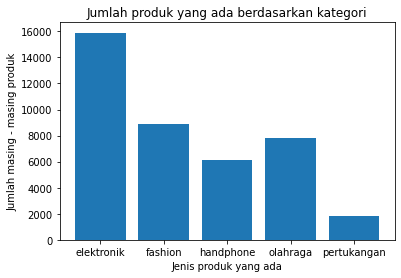

In [14]:
jenis = df_raw.groupby(['category'])['product_id'].count()

plt.bar(jenis.index, jenis)
plt.ylabel("Jumlah masing - masing produk")
plt.xlabel("Jenis produk yang ada")
plt.title("Jumlah produk yang ada berdasarkan kategori")
plt.show()

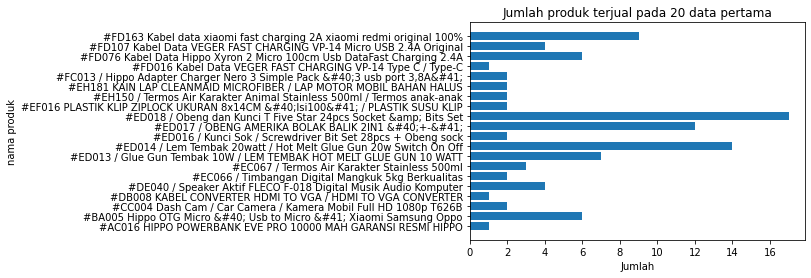

In [15]:
jumlahprodukterjual = df_raw.groupby(['product_name'])['sold'].count().iloc[:20]
plt.barh(jumlahprodukterjual.index, jumlahprodukterjual)
plt.ylabel("nama produk")
plt.xlabel("Jumlah")
plt.title("Jumlah produk terjual pada 20 data pertama")
plt.show()

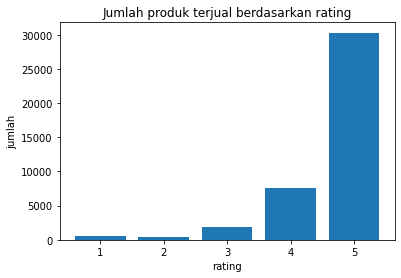

In [16]:
jumlahprodukterjualberdasarkanrating = df_raw.groupby(['rating'])['sold'].count()
plt.bar(jumlahprodukterjualberdasarkanrating.index, jumlahprodukterjualberdasarkanrating)
plt.ylabel("jumlah")
plt.xlabel("rating")
plt.title("Jumlah produk terjual berdasarkan rating")
plt.show()

## Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [17]:
import re
def proc_feature(features):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', features)
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = processed_feature.lower()  
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    processed_feature = regrex_pattern.sub(r'',processed_feature)
    processed_feature = re.sub(r'[^\x00-\x7F]+',' ', processed_feature)
    return(processed_feature)

In [18]:
#Load data list kata bersentimen negatif
neg_file=pd.read_csv('https://github.com/riochr17/Analisis-Sentimen-ID/raw/master/data/negatif.txt',header=None,delimiter='\t').values
neg_file=list(neg_file.reshape(neg_file.shape[0],))

#Load data list kata bersentimen positif
pst_file=pd.read_csv('https://github.com/riochr17/Analisis-Sentimen-ID/raw/master/data/positif.txt',header=None,delimiter='\t').values
pst_file=list(pst_file.reshape(pst_file.shape[0],))

In [19]:
#Load data list stopwords bahasa indonesia
stp_word=pd.read_csv('https://github.com/stopwords-iso/stopwords-id/raw/master/stopwords-id.txt',header=None).values

In [20]:
#//Diambil 30000 data secara acak untuk dilakukan training data dan model test
sample=df_raw.sample(30000).reset_index(drop=True)
sample['text']=sample['text'].apply(lambda x: proc_feature(x)) #Filter karakter dan kata pada masing-masing data
#Penghapusan stopwords
sample['text_stpw']=sample['text'].apply(lambda x: ' '.join([item for item in x.split(' ') if item not in stp_word]))

In [21]:
#Pada bagian ini, dihitung jumlah kata negatif dan positif masing-masing tweet berdasarkan list kata pada neg_file dan pst_file

post_words_count=sample['text_stpw'].apply(lambda x: len([w for w in x.split(' ') if w in pst_file]))
neg_words_count=sample['text_stpw'].apply(lambda x: len([w for w in x.split(' ') if w in neg_file]))

In [22]:
#Menghitung skor sentimen, selisih jml kata positif dan negatif
sample['sent_score']=(post_words_count-neg_words_count)
#Memberi sign utk selisih <0 -1, >0 1, dan =0 0
sample['sentiment']=sample['sent_score'].apply(lambda x: 1 if x>0 else -1 if x<0 else 0)

In [23]:
#sample.head(5)

In [24]:
sample.sentiment.value_counts()

 1    22423
 0     7028
-1      549
Name: sentiment, dtype: int64

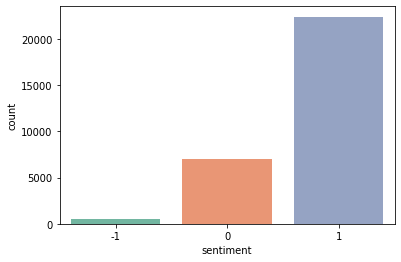

In [25]:
ax = sns.countplot(x="sentiment", data=sample, palette="Set2")

In [26]:
#Memberi sign utk selisih <0 -1, >0 1, dan =0 0
sample['sentiment_rat']=sample['rating'].apply(lambda x : -1 if x <3 else 0 if x==3 else 1)

In [27]:
sample.sentiment_rat.value_counts()

 1    28014
 0     1311
-1      675
Name: sentiment_rat, dtype: int64

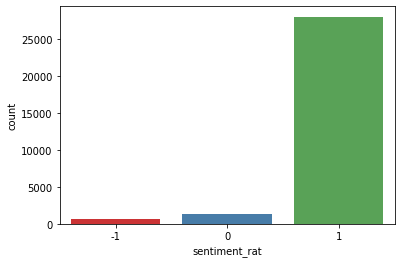

In [28]:
axe = sns.countplot(x="sentiment_rat", data=sample, palette="Set1")

In [29]:
sample.head(2)

,text,rating,category,product_name,product_id,sold,text_stpw,sent_score,sentiment,sentiment_rat
0,produk sesuai dengan deskripsi pengiriman cepat,5,fashion,Casio Jam Tangan Unisex MQ-76,389508038,254,produk sesuai deskripsi pengiriman cepat,2,1,1
1,makasih banyak kakakkkk,5,elektronik,Kabel Printer LPT to USB / USB to Pararel Conv...,178726506,280,makasih kakakkkk,0,0,1


#### Spliting data

In [30]:
X = sample.text_stpw
y = sample.sentiment
yr = sample.sentiment_rat

In [31]:
y = y.map({-1:0,0:1,1:2})
yr = y.map({-1:0,0:1,1:2})

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 77)

In [33]:
print(f"Total training samples: {len(X_train)}")
print(f"Total test samples: {len(X_test)}")
print(f"Total samples: {len(X_train) + len(X_test)}")

Total training samples: 24000
Total test samples: 6000
Total samples: 30000


### Data Sentimen Score

In [81]:
# Ambil data random
import random
random_index = random.randint(0, len(sample)-5)
for row in sample[["text_stpw", "sentiment"]][random_index:random_index+5].itertuples():
  _, text, target = row
  if target == 0:
    print(f"Target: {target} (Netral)")
  elif target == 1:
    print(f"Target: {target} (Positif)")
  else:
    print(f"Target: {target} (Negatif)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (Positif)
Text:
barangnya oke lumayan dalemnya tp aga sempit ya jd gitu nyaman dipake tp overall lumayan

---

Target: 1 (Positif)
Text:
sesuai harga not bad

---

Target: 1 (Positif)
Text:
pengiriman cepat sesuai pesanan terima kasih

---

Target: 1 (Positif)
Text:
barang diterima kondisi bagus

---

Target: 0 (Netral)
Text:
terimakasihhhh 

---



### Data Sentimen Rating

In [82]:
# Ambil data random
import random
random_index = random.randint(0, len(sample)-5)
for row in sample[["text_stpw", "sentiment_rat"]][random_index:random_index+5].itertuples():
  _, text, target = row
  if target == 0:
    print(f"Target: {target} (Netral)")
  elif target == 1:
    print(f"Target: {target} (Positif)")
  else:
    print(f"Target: {target} (Negatif)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (Positif)
Text:
pengiriman cepat barang sesuai semoga awet penggunaannya

---

Target: 1 (Positif)
Text:
barang dah sampe blum buka mudah2an bagus 

---

Target: 1 (Positif)
Text:
barangnya sdh sdh sy terima kwalitas sesuai harapan terima kasih

---

Target: 1 (Positif)
Text:
penjual super laris terusss gan 

---

Target: 1 (Positif)
Text:
okeeeeeeeeeeeeeeeeeeeee

---



In [36]:
# siapkan target
from tensorflow.keras.utils import to_categorical

def prepare_targets(y_train, y_test):
	y_train_enc = to_categorical(y_train)
	y_test_enc = to_categorical(y_test)
	return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train, y_test)

In [37]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [38]:
# split train-val
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X_train.to_numpy(),
                                                                            y_train,
                                                                            test_size=0.2,
                                                                            random_state=77)

In [39]:
train_sentences[:10], train_labels[:10]

(array(['mendengarkan radio earphone berfungsi coba pakai handsfree 3 pcs yg terdengar mohon kedepan nya teliti mengirim barangnya trims',
        'keren sesuai gambar gak nyesel deh',
        'barang bagus cocok laptopnya pengiriman cepat',
        'pesanannya thx gan ',
        'barang sesuai deskripsi kondisi packing rapi',
        'kualitas barang bagusdan solid respon penjual cepat pengiriman cepat puas',
        'mantapll lurrrrrrrrrrrrrrrrrrr', 'mantap dipakai top barangnya ',
        'recommended banget serba cepat sesuai mantap',
        'good produk good shipment good response '], dtype=object),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.]], dtype=float32))

### Tokenisasi

In [40]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [41]:
# Hitung rata-rata token yang dibentuk dalam satu reviews
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

6

In [42]:
# Setup text vectorization with custom variables
max_vocab_length = 10000
max_length = 6 # rata-rata token per reviews

# setup text vectorization dengan parameter default
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # berapa banyak vocab yang ingin dibentuk
                                    standardize="lower_and_strip_punctuation", # cara memproses teks
                                    split="whitespace", # delimiter pemisah token
                                    ngrams=None, # membuat berapa grup kata token (bisa 2 pasang / bigram, 3 pasang / trigram, dst.)
                                    output_mode="int", # token di map ke tipe data apa (integer seperti yang dicontohkan di lecture)
                                    output_sequence_length=max_length) # berapa panjang output token yg diinginkan

In [43]:
# fit data train ke text_vectorizer
text_vectorizer.adapt(train_sentences)

In [44]:
# Buat contoh reviews untuk membuktikan tokenizer bekerja
sample_sentence = "barang sesuai gambar tidak bohong"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[   2,    3,   31,    1, 3724,    0]], dtype=int64)>

In [45]:
# Ambil data random dari training set
random_sentence = random.choice(train_sentences)
print(f"Teks Asli:\n{random_sentence}\
      \n\nVersi Vektorisasi:")
text_vectorizer([random_sentence])

Teks Asli:
makasi yaaa barang bagus       

Versi Vektorisasi:


<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[208, 248,   2,   5,   0,   0]], dtype=int64)>

In [46]:
# Ambil kata unik dari vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # token terbanyak
bottom_5_words = words_in_vocab[-5:] # token tersedikit
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 9515
Top 5 most common words: ['', '[UNK]', 'barang', 'sesuai', 'cepat']
Bottom 5 least common words: ['071', '07', '01', '0000000000000000000', '00']


### Create Embedding Layer

In [47]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [48]:
# Coba memasukan data ke layer embedding
random_sentence = random.choice(train_sentences)
print(f"Teks Asli:\n{random_sentence}\
      \n\nVersi Embedded:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Teks Asli:
sampe blm coba bagus      

Versi Embedded:


<tf.Tensor: shape=(1, 6, 128), dtype=float32, numpy=
array([[[ 4.60473783e-02, -2.65732650e-02,  2.52107270e-02,
         -5.85857779e-03, -7.14338943e-03,  2.52375491e-02,
         -2.97336709e-02, -4.89540212e-02, -1.02188215e-02,
          3.86940576e-02, -1.40786394e-02,  1.15494244e-02,
         -4.78431955e-02, -1.89512260e-02,  4.34118994e-02,
         -2.67542955e-02,  1.07717514e-02, -3.66551504e-02,
          3.17252539e-02,  2.99861766e-02, -1.42570511e-02,
         -3.08372732e-02,  3.33931334e-02,  4.99017946e-02,
         -2.38336567e-02, -1.66109093e-02,  4.98288758e-02,
          2.84326784e-02, -3.90375033e-02, -2.52614021e-02,
         -2.61883624e-02,  1.64234675e-02, -3.58424187e-02,
         -5.90406731e-03,  4.36228849e-02,  2.95798294e-02,
         -4.47201245e-02, -1.58341751e-02, -1.43998377e-02,
          1.63705274e-03, -3.70919704e-04, -2.48324033e-02,
          3.27630378e-02,  4.77093495e-02, -4.41824570e-02,
          4.34259064e-02, -4.45608981e-02, -2.2

## Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

### 1.Model LSTM

### 2. Model GRU

## Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

### 1. Model LSTM

In [95]:
import tensorflow as tf

tf.keras.backend.clear_session()

In [96]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss', #Nilai yang dimonitor
                          mode='min',
                          min_delta = 0, #Nilai mutlak dan merupakan perubahan minimum yang diperlukan sebelum kita berhenti
                          patience = 15, #Nomor epochs yang ditunggu sebelum berhenti 
                          verbose = 1,
                          restore_best_weights = True) #Ketika berhenti di weights yang terbaik

In [97]:
# Bua Model LSTM
from tensorflow.keras import layers
from keras.layers import Dense, Dropout
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x) 
x = layers.Dropout(0.5)(x)
print(x.shape)
outputs = layers.Dense(3, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_LSTM")

(None, 64)


In [98]:
model_1.summary()

Model: "model_1_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 6)                 0         
_________________________________________________________________
embedding (Embedding)        (None, 6, 128)            1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 1,329,603
Trainable params: 1,329,603
Non-trainable params: 0
____________________________________________

In [99]:
# Compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [100]:
# Fit model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=50,
                              validation_data=(val_sentences, val_labels), callbacks=[earlystop], verbose=2)

Epoch 1/50
600/600 - 19s - loss: 0.1135 - accuracy: 0.9595 - val_loss: 0.2037 - val_accuracy: 0.9340
Epoch 2/50
600/600 - 13s - loss: 0.0575 - accuracy: 0.9810 - val_loss: 0.1983 - val_accuracy: 0.9402
Epoch 3/50
600/600 - 13s - loss: 0.0434 - accuracy: 0.9856 - val_loss: 0.2516 - val_accuracy: 0.9379
Epoch 4/50
600/600 - 12s - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.2943 - val_accuracy: 0.9365
Epoch 5/50
600/600 - 13s - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.3274 - val_accuracy: 0.9365
Epoch 6/50
600/600 - 13s - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.3114 - val_accuracy: 0.9377
Epoch 7/50
600/600 - 12s - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.4693 - val_accuracy: 0.9208
Epoch 8/50
600/600 - 12s - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.3723 - val_accuracy: 0.9352
Epoch 9/50
600/600 - 12s - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.3848 - val_accuracy: 0.9369
Epoch 10/50
600/600 - 13s - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.4128 - val_accura

### 2. Model GRU

In [64]:
import tensorflow as tf

tf.keras.backend.clear_session()

In [65]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x) 
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_GRU")

In [66]:
# Compile GRU model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
model_2.summary()

Model: "model_2_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 6)                 0         
_________________________________________________________________
embedding (Embedding)        (None, 6, 128)            1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 1,317,443
Trainable params: 1,317,443
Non-trainable params: 0
_____________________________________________

In [68]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=50,
                              validation_data=(val_sentences, val_labels), callbacks=[earlystop], verbose=2)

Epoch 1/50
600/600 - 16s - loss: 0.1599 - accuracy: 0.9443 - val_loss: 0.1703 - val_accuracy: 0.9400
Epoch 2/50
600/600 - 12s - loss: 0.0774 - accuracy: 0.9730 - val_loss: 0.2122 - val_accuracy: 0.9333
Epoch 3/50
600/600 - 12s - loss: 0.0521 - accuracy: 0.9822 - val_loss: 0.2174 - val_accuracy: 0.9358
Epoch 4/50
600/600 - 11s - loss: 0.0429 - accuracy: 0.9860 - val_loss: 0.2251 - val_accuracy: 0.9373
Epoch 5/50
600/600 - 11s - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.2680 - val_accuracy: 0.9352
Epoch 6/50
600/600 - 13s - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.2692 - val_accuracy: 0.9344
Epoch 7/50
600/600 - 13s - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.3001 - val_accuracy: 0.9346
Epoch 8/50
600/600 - 12s - loss: 0.0223 - accuracy: 0.9936 - val_loss: 0.3013 - val_accuracy: 0.9342
Epoch 9/50
600/600 - 12s - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.2951 - val_accuracy: 0.9346
Epoch 10/50
600/600 - 12s - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.3735 - val_accura

## Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

### 1. Model LSTM

In [90]:
# Buat prediksi
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # prediksi dari 10 data teratas

array([[2.93864915e-03, 2.80775465e-02, 9.68983769e-01],
       [6.73255920e-02, 5.07509187e-02, 8.81923437e-01],
       [9.32916100e-06, 4.83980584e-05, 9.99942303e-01],
       [1.21579171e-04, 3.48323025e-04, 9.99530077e-01],
       [5.09765050e-05, 7.13591988e-04, 9.99235392e-01],
       [4.14968375e-03, 1.43968733e-02, 9.81453419e-01],
       [2.33252686e-05, 1.09768334e-04, 9.99866843e-01],
       [2.05447854e-04, 9.98100102e-01, 1.69441476e-03],
       [3.49983711e-05, 5.87582879e-04, 9.99377429e-01],
       [2.25191652e-05, 1.43988640e-04, 9.99833465e-01]], dtype=float32)

In [91]:
model_1_pred_probs[:10].argmax(axis=1)

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [93]:
y_pred = model_1.predict(X_test)
model_1_results = calculate_results(y_true=y_test.argmax(axis=1), 
                                    y_pred=y_pred.argmax(axis=1))
model_1_results

{'accuracy': 94.33333333333334,
 'precision': 0.9413237872232071,
 'recall': 0.9433333333333334,
 'f1': 0.941656285569424}

In [94]:
print ('AUC score:',roc_auc_score(y_test,model_1.predict(X_test),multi_class='ovo'))

AUC score: 0.9797912276678659


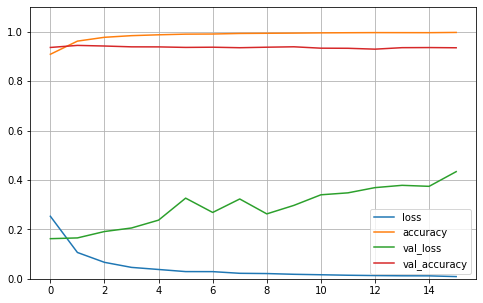

In [79]:
pd.DataFrame(model_1_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.show()

In [61]:
acc = model_1_history.history['accuracy']
val_acc = model_1_history.history['val_accuracy']

loss = model_1_history.history['loss']
val_loss = model_1_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

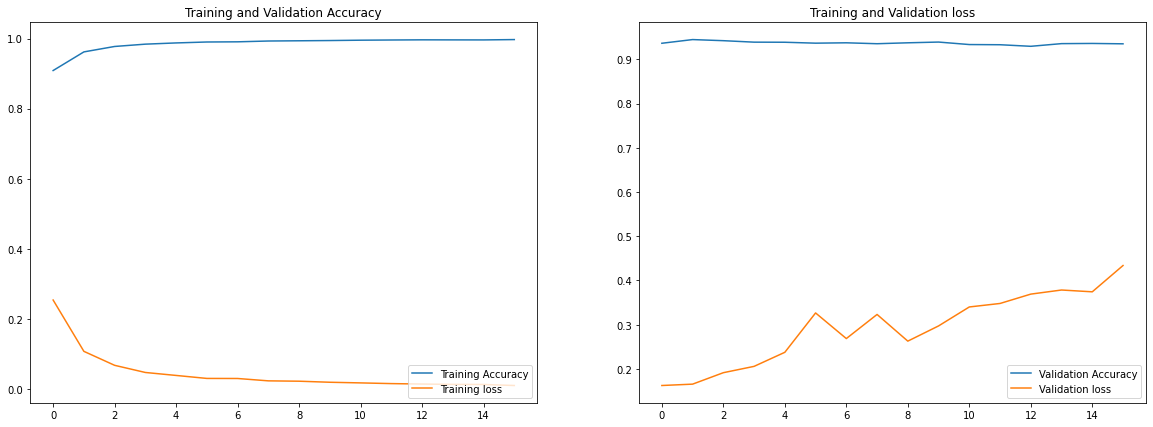

In [62]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(loss, label = 'Training loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(val_acc, label = 'Validation Accuracy')
plt.plot(val_loss, label = 'Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

In [63]:
model_1.evaluate(X_test,y_test)

188/188 [==============================] - 2s 6ms/step - loss: 0.1575 - accuracy: 0.9398


[0.15753114223480225, 0.9398333430290222]

### 2. Model GRU

In [69]:
# Buat prediksi
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10] # prediksi dari 10 data teratas

array([[2.7742365e-04, 2.8921044e-02, 9.7080159e-01],
       [4.3387499e-02, 5.7506762e-02, 8.9910573e-01],
       [2.6583491e-06, 2.1054638e-04, 9.9978679e-01],
       [8.0429991e-06, 4.4725023e-04, 9.9954468e-01],
       [3.7602564e-05, 8.5634850e-03, 9.9139893e-01],
       [6.6684571e-04, 2.2593010e-02, 9.7674018e-01],
       [3.8301337e-06, 3.0265903e-04, 9.9969351e-01],
       [8.7983970e-04, 9.9826825e-01, 8.5194805e-04],
       [1.4261389e-05, 4.5819762e-03, 9.9540377e-01],
       [5.7192287e-06, 7.4783026e-04, 9.9924648e-01]], dtype=float32)

In [70]:
model_2_pred_probs[:10].argmax(axis=1)

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100,
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [72]:
y_pred = model_2.predict(X_test)
model_2_results = calculate_results(y_true=y_test.argmax(axis=1), 
                                    y_pred=y_pred.argmax(axis=1))
model_2_results

{'accuracy': (94.11666666666667,),
 'precision': 0.9392845666364571,
 'recall': 0.9411666666666667,
 'f1': 0.9387434126483135}

In [73]:
print ('AUC score:',roc_auc_score(y_test,model_2.predict(X_test),multi_class='ovo'))

AUC score: 0.9774643137716753


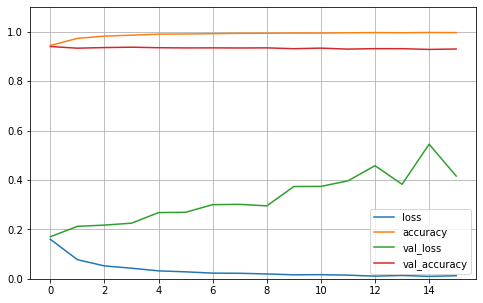

In [78]:
pd.DataFrame(model_2_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.show()

In [79]:
acc = model_2_history.history['accuracy']
val_acc = model_2_history.history['val_accuracy']

loss = model_2_history.history['loss']
val_loss = model_2_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

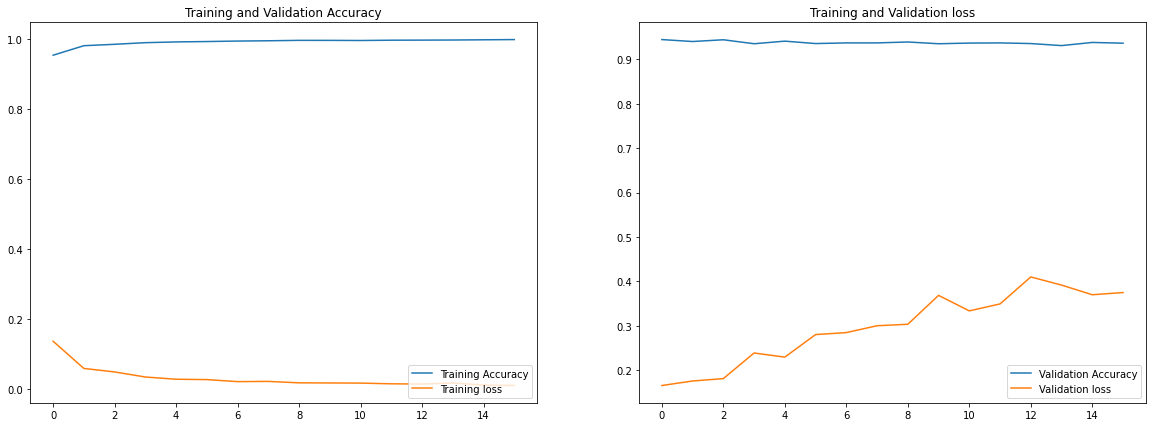

In [86]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(loss, label = 'Training loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(val_acc, label = 'Validation Accuracy')
plt.plot(val_loss, label = 'Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

In [81]:
model_2.evaluate(X_test,y_test)

188/188 [==============================] - 1s 4ms/step - loss: 0.1703 - accuracy: 0.9497


[0.1703476756811142, 0.9496666789054871]

## Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

##### Mencoba pengujian dengan data yang dibuat student

### Prediction

In [80]:
# inference data baru

sms_baru = [
            "supperrrrrr",
            "barang rusak, dasar penipu",
            "keren, bagus promonya banyak"
]


hasil = model_1.predict(sms_baru)
hasil.argmax(axis=1)

array([1, 1, 2], dtype=int64)

## Pengambilan Kesimpulan

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

### Analysis Data

In [112]:
X=df_raw['text'].apply(lambda x: proc_feature(x)) #Filter karakter dan beberapa kata

In [115]:
pred=model_1.predict(X) #Memprediksi data keseluruhan

In [118]:
df_raw['sentiment'] = pred.argmax(axis=1)

In [138]:
df_raw['sentiment']=df_raw['sentiment'].replace({0:'Negatif',1:'Netral',2:'Positif'})

<AxesSubplot:title={'center':'Analisa Product Reviews Tokopedia'}, ylabel='sentiment'>

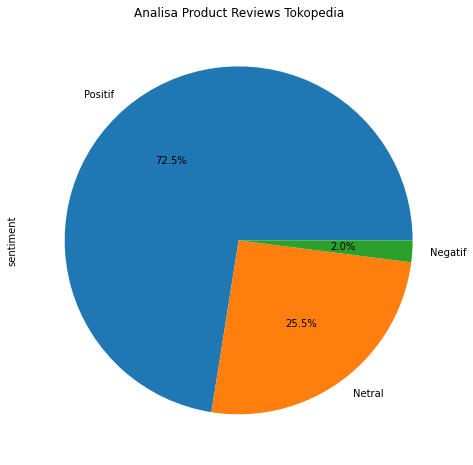

In [139]:
df_raw['sentiment'].value_counts().plot(
    kind='pie',
    figsize=(16, 8),
    autopct='%1.1f%%',
    title='Analisa Product Reviews Tokopedia')

<AxesSubplot:title={'center':'Category Sentimen Positif'}>

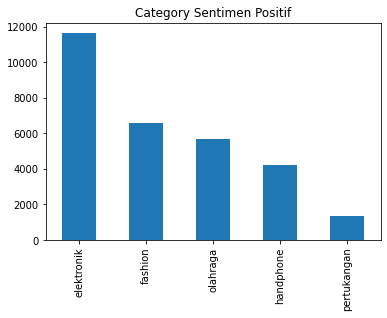

In [140]:
df_raw[df_raw['sentiment'] == 'Positif']['category'].value_counts()[:6].plot(
    kind='bar', title='Category Sentimen Positif')

<AxesSubplot:title={'center':'Category Sentimen Negatif'}>

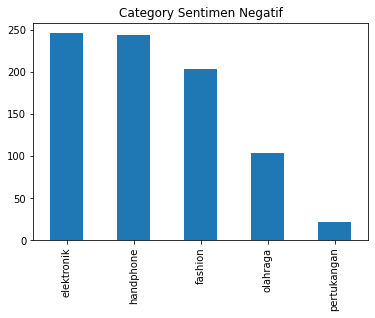

In [142]:
df_raw[df_raw['sentiment'] == 'Negatif']['category'].value_counts()[:6].plot(
    kind='bar', title='Category Sentimen Negatif')

<AxesSubplot:title={'center':'Category Sentimen Netral'}>

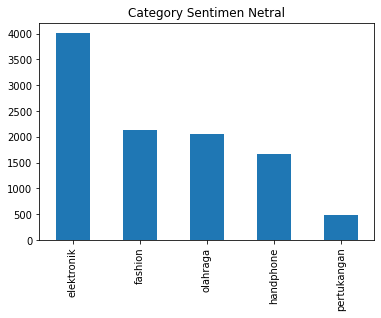

In [143]:
df_raw[df_raw['sentiment'] == 'Netral']['category'].value_counts()[:6].plot(
    kind='bar', title='Category Sentimen Netral')

<AxesSubplot:title={'center':'Category Sentimen Positif'}>

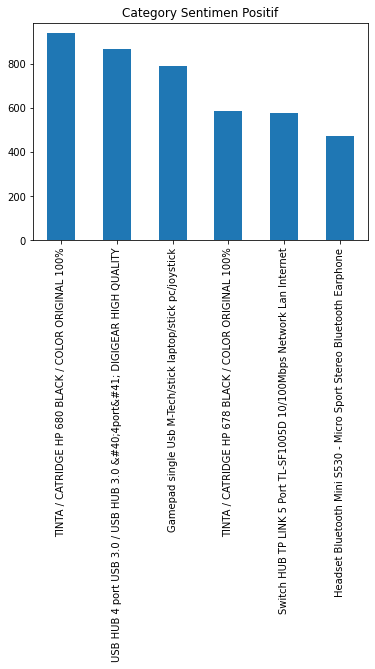

In [135]:
df_raw[df_raw['sentiment'] == 'Positif']['product_name'].value_counts()[:6].plot(
    kind='bar', title='Category Sentimen Positif')

<AxesSubplot:title={'center':'Retweet'}, xlabel='sentiment'>

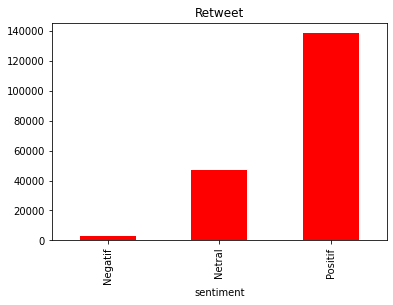

In [159]:
df_raw.groupby('sentiment').sum()['rating'].plot(kind='bar',color='red',title='Retweet')

### Saving Model

Model yang disimpan adalah lstm, dikarenakan mempunyai akurasi yang tinggi

In [129]:
filepath = './save_model'
tf.keras.models.save_model(
    model_1,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

INFO:tensorflow:Assets written to: ./save_model\assets


INFO:tensorflow:Assets written to: ./save_model\assets
